In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline

In [2]:
#read the data
data = pd.read_csv('../data/ionosphere.csv')
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


#### Some information on the dataset
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the [paper](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf) for more details. 

The targets were free electrons in the ionosphere."Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

In order to check the effect of regularization on test data, split the data into train and test using sklearn.

In [3]:
from sklearn.model_selection import train_test_split

#split the data into train and test
features = [item for item in data.columns[:-1]]
data = data.replace({'g':1, 'b': 0})
X = data[features]
y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(x_train)

280

Create a model using Logistic Regression from sklearn. 

In [4]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(penalty = 'l2', C = 1).fit(x_train,y_train)
print("logistic coefficients:", logistic.coef_)

yhat = logistic.predict(x_test)
np.mean(y_test == yhat)  ## y_test == yhat equals 1 if the two values equals to each other, equals 0  if the two value do note equal to each other



logistic coefficients: [[ 1.32045753  0.          1.59579905  0.68578992  1.16167967  0.93302896
   0.62024481  1.02676773  0.91622331  0.12747296 -1.04717726 -0.23710863
  -0.03646835  0.64310562  0.82227942 -0.00472751  0.17258024  0.24355136
  -0.77916886 -0.19301605  0.06194289 -1.64456072  0.99757557  0.31463758
  -0.22099731  1.13450616 -2.28084004 -0.52074871  1.14348606  0.4384442
   0.82504707 -0.15269623 -0.318548   -0.7504029 ]]


0.8169014084507042

    1. Perform a ridge regression using sklearn. Test for the accuracy on the test dataset

In [5]:
#perform ridge regression and test accuracy
ridge = LogisticRegression(penalty = 'l2', C = 1).fit(x_train,y_train)
print("ridge coefficients:", ridge.coef_)

np.mean(y_test == ridge.predict(x_test))

ridge coefficients: [[ 1.32045753  0.          1.59579905  0.68578992  1.16167967  0.93302896
   0.62024481  1.02676773  0.91622331  0.12747296 -1.04717726 -0.23710863
  -0.03646835  0.64310562  0.82227942 -0.00472751  0.17258024  0.24355136
  -0.77916886 -0.19301605  0.06194289 -1.64456072  0.99757557  0.31463758
  -0.22099731  1.13450616 -2.28084004 -0.52074871  1.14348606  0.4384442
   0.82504707 -0.15269623 -0.318548   -0.7504029 ]]


0.8169014084507042

    2. Perform lasso regression using sklearn. Test for the accuracy on the test dataset

In [6]:
#perform lasso regression and test accuracy
lasso = LogisticRegression(penalty = 'l1', C = 1).fit(x_train,y_train)
print("lasso coefficients", lasso.coef_)

np.mean(y_test == lasso.predict(x_test))

lasso coefficients [[ 2.82101277  0.          1.9951411   0.40862684  1.15327047  0.86692288
   0.69096919  0.80931522  0.5401186   0.         -1.02268662  0.
   0.          0.44015242  0.8058213   0.          0.07938741  0.11157532
  -0.9642519   0.          0.         -1.92592705  1.03373505  0.19493134
   0.          0.93669389 -2.80681665  0.          1.35762774  0.5728914
   0.93394788  0.         -0.10814162 -0.92261155]]


0.8591549295774648

    3. Tune the parameters of C(1/lambda) and appropriate choice of regularization. Default values of C and regularization is 1.0 and 'l2' - ridge respectively. Record the results (accuracy, coefficients and lambdas) in a dataframe.

In [7]:
#perform tuning and record the results

def get_result(regularization, C):
    if regularization == "ridge":
        penalty = "l2"
    else:
        penalty = "l1"
    model = LogisticRegression(penalty = penalty, C = C).fit(x_train,y_train)
    accuracy = np.mean(y_test == model.predict(x_test))
    lambdas = 1/C
    return model.coef_, accuracy, lambdas

get_result("ridge", 1)

(array([[ 1.32045753,  0.        ,  1.59579905,  0.68578992,  1.16167967,
          0.93302896,  0.62024481,  1.02676773,  0.91622331,  0.12747296,
         -1.04717726, -0.23710863, -0.03646835,  0.64310562,  0.82227942,
         -0.00472751,  0.17258024,  0.24355136, -0.77916886, -0.19301605,
          0.06194289, -1.64456072,  0.99757557,  0.31463758, -0.22099731,
          1.13450616, -2.28084004, -0.52074871,  1.14348606,  0.4384442 ,
          0.82504707, -0.15269623, -0.318548  , -0.7504029 ]]),
 0.8169014084507042,
 1.0)

In [32]:
def dataframe(regularization):
    accur = []
    coef = []
    lambdas = []
    C = 1e-5
    while C < 1e12:
        coefficient, accuracy, Lambda = get_result(regularization, C)
        accur.append(accuracy)
        coef.append(coefficient)
        lambdas.append(Lambda)
        C = C*10
    coef = [x for item in coef for x in item]
    d = {"accuracy": accur, "coef": coef, "lambdas": lambdas}
    dataframe = pd.DataFrame(data = d)
    return dataframe
dataframe("lasso")

,accuracy,coef,lambdas
0,0.338028,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000e+05
1,0.338028,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000e+04
2,0.338028,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000e+03
3,0.338028,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000e+02
4,0.732394,"[0.0, 0.0, 0.9346065118994029, 0.0, 0.75182452...",1.000000e+01
5,0.859155,"[2.821816500750704, 0.0, 1.9953186189422323, 0...",1.000000e+00
6,0.802817,"[14.085088792474373, 0.0, 5.878833662251286, 1...",1.000000e-01
7,0.816901,"[45.251653764567806, 0.0, 12.199419314762949, ...",1.000000e-02
8,0.816901,"[60.403022174801855, 0.0, 15.169765677812027, ...",1.000000e-03
9,0.816901,"[59.20825583043972, 0.0, 15.098349428784793, 3...",1.000000e-04


    4. Plot the coefficients against lambdas and accuracy against lambdas for both lasso and ridge regularization.

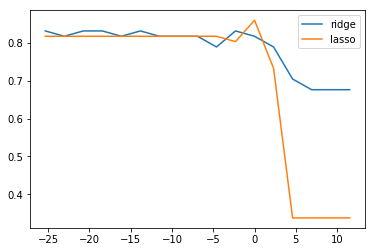

In [35]:
#plot coefficients against lambdas and accuracy against lambdas
df_ridge = dataframe('ridge')
plt.plot(np.log(df_ridge['lambdas']),df_ridge.accuracy, label = 'ridge')

df_lasso = dataframe('lasso')
plt.plot(np.log(df_lasso['lambdas']),df_lasso.accuracy, label = 'lasso')

plt.legend()

Ridge


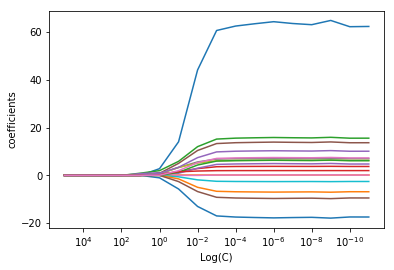

Lasso


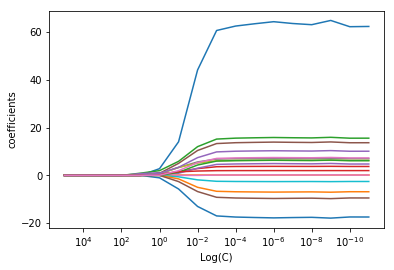

In [38]:
print("Ridge")
for y in range(len(df_ridge)):
    x=[x[y] for x in df['coef']]
    plt.semilogx(df['lambdas'],x)
plt.gca().invert_xaxis()
plt.xlabel('Log(C)')
plt.ylabel('coefficients')
plt.show()

print("Lasso")
for y in range(len(df_lasso)):
    x=[x[y] for x in df['coef']]
    plt.semilogx(df['lambdas'],x)
plt.gca().invert_xaxis()
plt.xlabel('Log(C)')
plt.ylabel('coefficients')
plt.show()